# Big Mart data Sales Prediction

In [1]:
#IMPORTING LIBRARIES:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
#Importing Dataset:
data_shopping= pd.read_csv("train_v9rqX0R.csv")

In [3]:
data_shopping.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Making a Copy of Original Data
data =data_shopping.copy()

In [5]:
#Lowering the down column names
data.columns = data.columns.str.lower()

In [6]:
#Calculating Missing Values
(data.isnull().sum()/len(data))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

## Imputation Of Missing Values in the Columns:

In [7]:
group_mean_weight = data.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])

In [8]:
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [9]:
mean_weight = group_mean_weight.iloc[:,[0][0]]

In [10]:
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [11]:
# Function to impute Missing Value in item_weight column:

def missing_value(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277108
        elif item_type == "Breads":
            return 11.346936
        elif item_type == "Breakfast":
            return 12.768202
        elif item_type == "Canned":
            return 12.305705
        elif item_type == "Dairy":
            return 13.426069
        elif item_type == "Frozen Foods":
            return  12.867061
        elif item_type == "Fruits and Vegetables":
            return 13.224769
        elif item_type == "Hard Drinks":
            return 11.400328
        elif item_type == "Health and Hygiene":
            return 13.142314
        elif item_type == "Household":
            return 13.384736
        elif item_type == "Meat":
            return 12.817344
        elif item_type == "Others":
            return 13.853285
        elif item_type == "Seafood":
            return 12.552843
        elif item_type == "Snack Foods":
            return 12.987880
        elif item_type == "Soft Drinks":
            return 11.847460
        elif item_type == "Starchy Foods":
            return 13.690731
    return item_weight            

In [12]:
#Imputing the missing value by using defined function
data["item_weight"] = data[["item_type","item_weight"]].apply(missing_value, axis = 1)

In [13]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## DATA UNDERSTANDING THROUGH VISUALIZATION

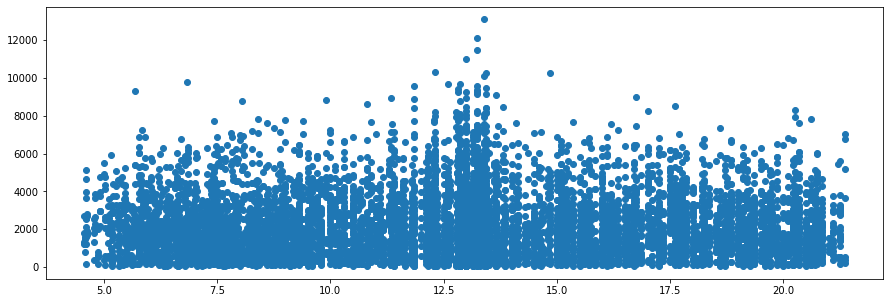

In [14]:
plt.figure(figsize=(15,5))
plt.scatter(data['item_weight'],data['item_outlet_sales'])
plt.show()

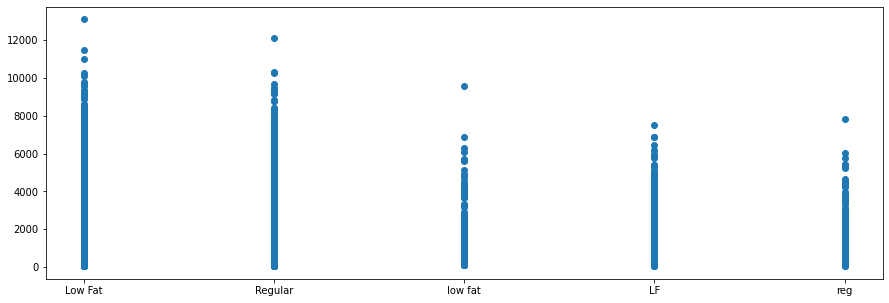

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(data['item_fat_content'],data['item_outlet_sales'])
plt.show()

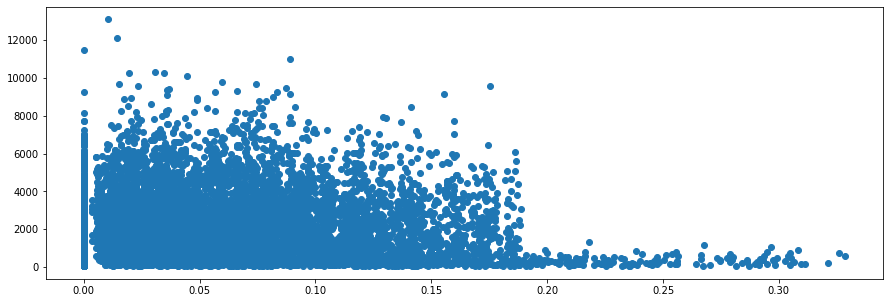

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(data['item_visibility'],data['item_outlet_sales'])
plt.show()

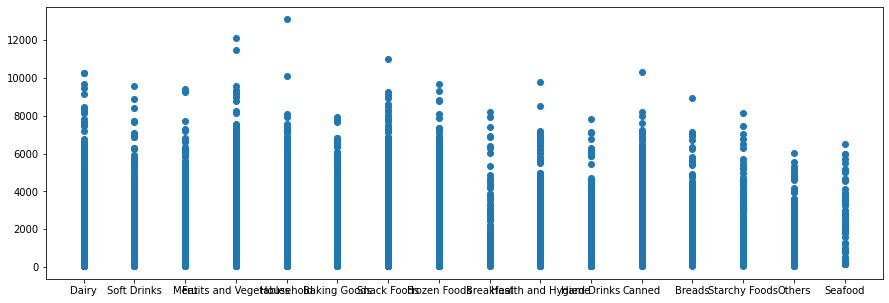

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(data['item_type'],data['item_outlet_sales'])
plt.show()

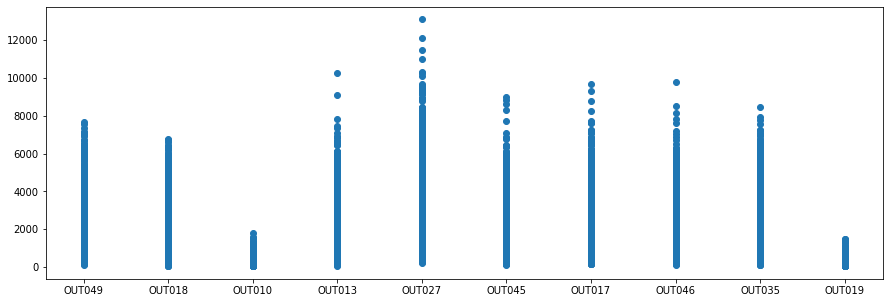

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(data['outlet_identifier'],data['item_outlet_sales'])
plt.show()

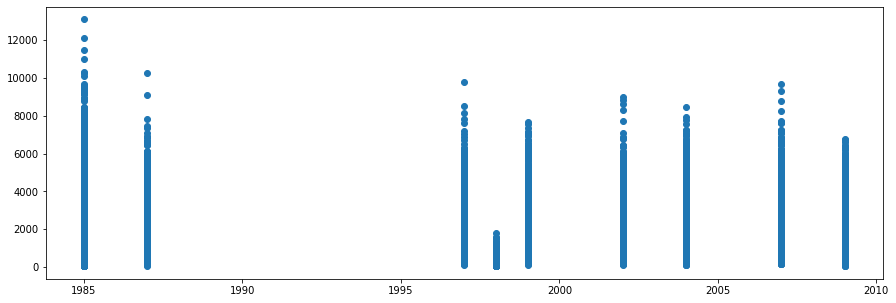

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(data['outlet_establishment_year'],data['item_outlet_sales'])
plt.show()

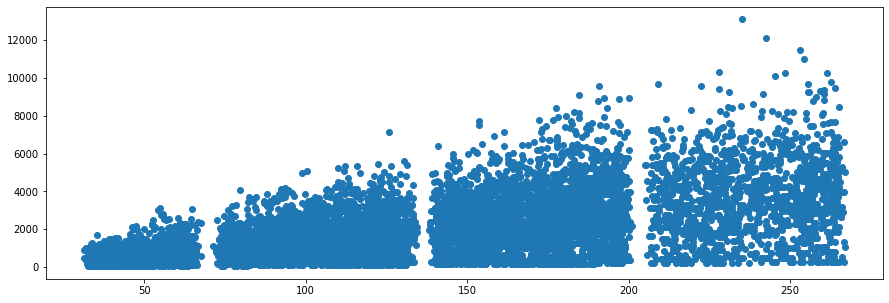

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(data['item_mrp'],data['item_outlet_sales'])
plt.show()

In [21]:
#plt.figure(figsize=(15,5))
#plt.scatter(data['outlet_size'],data['item_outlet_sales'])
#plt.show()

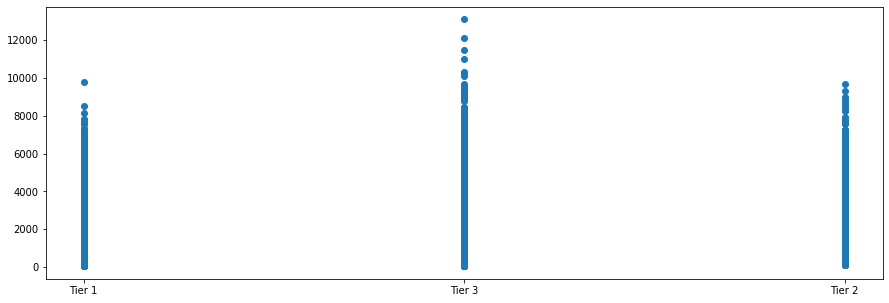

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(data['outlet_location_type'],data['item_outlet_sales'])
plt.show()

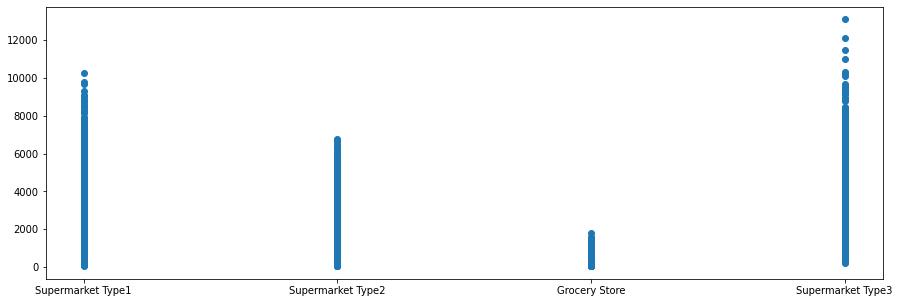

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(data['outlet_type'],data['item_outlet_sales'])
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

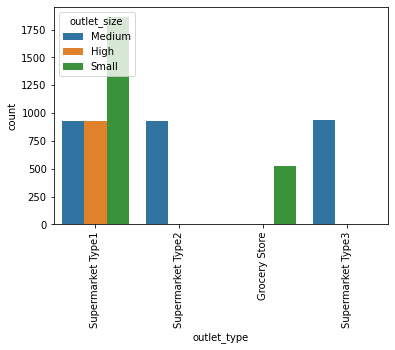

In [24]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = data, x = "outlet_type",hue = "outlet_size")
plt.xticks(rotation =90)

In [25]:
# Function for Imputing Missing value in Outlet_Size column:

def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    

In [26]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
data["outlet_size"] = data[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

**While exploring the item_fat_content, we founded "4" different unique values.**
Following ARE:
low fat - represent LOW FAT
reg - represent regular

In [27]:
data["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [28]:
data["item_fat_content"] = data["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()

In [29]:
data["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [30]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
mean_visibility = data.pivot_table(index = "item_identifier",  values = "item_visibility")

In [32]:
data.loc[(data["item_visibility"] == 0.0), "item_visibility"] = data.loc[(data["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])
                                                                                        

<AxesSubplot:xlabel='outlet_identifier', ylabel='item_outlet_sales'>

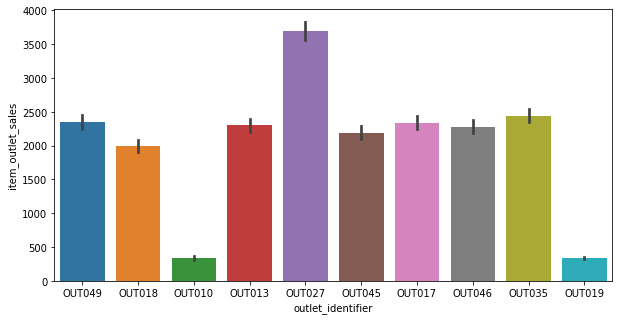

In [33]:
#understanding outlet_identifier depending on item_outlet_sales
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "outlet_identifier", y= "item_outlet_sales")

Text(0, 0.5, 'Mean of Item outlet sales')

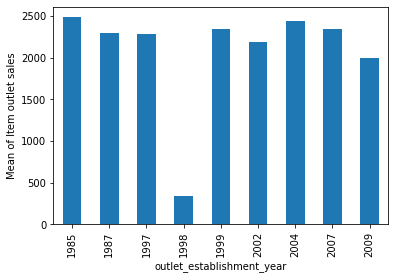

In [34]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
data.groupby("outlet_establishment_year")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

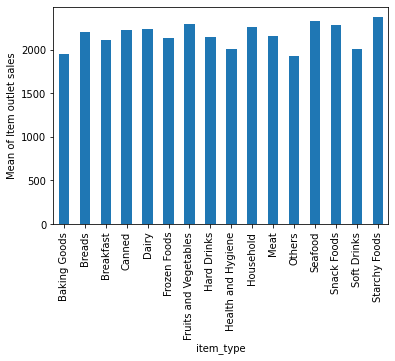

In [35]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
data.groupby("item_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

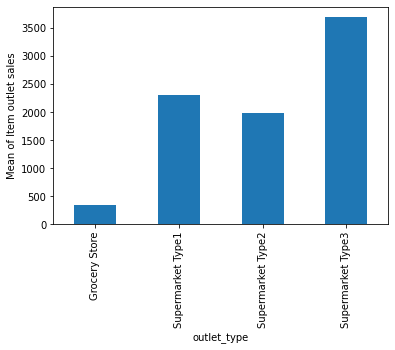

In [36]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
data.groupby("outlet_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

In [37]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Replacing The Categorical  Values Containing Columns With Their Respective Frequency or Count

In [38]:
cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']

In [39]:
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = data[i].value_counts().to_dict()
    data[i] = data[i].map(x)

In [40]:
#RESULTING DATASET AFTER CATEGORICAL VALUES CONVERTED TO NUMERICAL COLUMN
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


In [41]:
#COPYING DATA 
new_data= data.copy()
new_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


<AxesSubplot:>

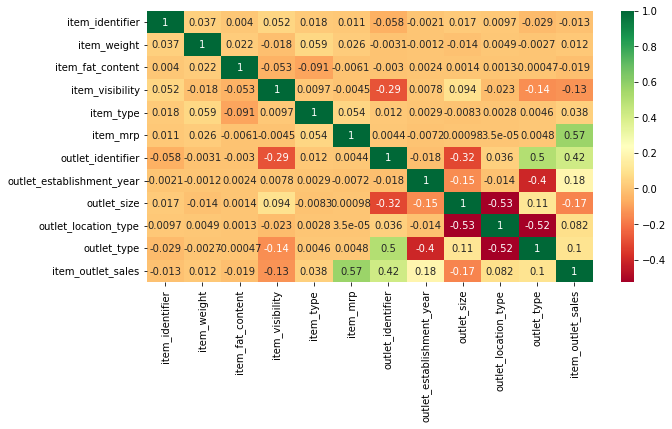

In [42]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)

In [43]:
new_data.corr()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
item_identifier,1.000000,0.036543,0.004013,0.051854,0.018019,0.011382,-0.057984,-0.002108,0.016880,0.009710,-0.028858,-0.012827
item_weight,0.036543,1.000000,0.022152,-0.018053,0.058977,0.025821,-0.003120,-0.001201,-0.013683,0.004935,-0.002682,0.012088
item_fat_content,0.004013,0.022152,1.000000,-0.052857,-0.091421,-0.006063,-0.002994,0.002386,0.001365,0.001250,-0.000471,-0.018719
item_visibility,0.051854,-0.018053,-0.052857,1.000000,0.009745,-0.004525,-0.288946,0.007787,0.093770,-0.022864,-0.141202,-0.128449
item_type,0.018019,0.058977,-0.091421,0.009745,1.000000,0.054331,0.011673,0.002897,-0.008256,0.002793,0.004632,0.037881
item_mrp,0.011382,0.025821,-0.006063,-0.004525,0.054331,1.000000,0.004376,-0.007190,0.000975,0.000035,0.004840,0.567574
outlet_identifier,-0.057984,-0.003120,-0.002994,-0.288946,0.011673,0.004376,1.000000,-0.018059,-0.316707,0.036374,0.502260,0.415103
outlet_establishment_year,-0.002108,-0.001201,0.002386,0.007787,0.002897,-0.007190,-0.018059,1.000000,-0.148200,-0.013545,-0.403018,0.184046
outlet_size,0.016880,-0.013683,0.001365,0.093770,-0.008256,0.000975,-0.316707,-0.148200,1.000000,-0.528092,0.110668,-0.165981
outlet_location_type,0.009710,0.004935,0.001250,-0.022864,0.002793,0.000035,0.036374,-0.013545,-0.528092,1.000000,-0.522718,0.082283


### Reanalising the correlation of data

In [44]:
new_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


In [45]:
columns=list(new_data.columns)

In [46]:
columns

['item_identifier',
 'item_weight',
 'item_fat_content',
 'item_visibility',
 'item_type',
 'item_mrp',
 'outlet_identifier',
 'outlet_establishment_year',
 'outlet_size',
 'outlet_location_type',
 'outlet_type',
 'item_outlet_sales']

In [47]:
columns.remove('item_outlet_sales')

In [48]:
columns

['item_identifier',
 'item_weight',
 'item_fat_content',
 'item_visibility',
 'item_type',
 'item_mrp',
 'outlet_identifier',
 'outlet_establishment_year',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [49]:
"""
for i in columns:
    plt.figure(figsize=(15,5))
    plt.scatter(new_data[i],new_data['item_outlet_sales'])
    plt.savefig('ImagesAfterCleaningData/'+i+' vs item_outlet_sales'+'.png')
    plt.show()
"""

"\nfor i in columns:\n    plt.figure(figsize=(15,5))\n    plt.scatter(new_data[i],new_data['item_outlet_sales'])\n    plt.savefig('ImagesAfterCleaningData/'+i+' vs item_outlet_sales'+'.png')\n    plt.show()\n"

In [50]:
#REMOVING LESS CORRELATED COLUMNS 
new_data =new_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [51]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,0.016047,249.8092,930,930,2793,5577,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5577,2097.2700
3,0.015274,182.0950,555,555,4798,1083,732.3800
4,0.008082,53.8614,932,932,932,5577,994.7052


In [52]:
#CALCULATING THE SKEWNESS OF THE DATA
new_data.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

#### VISUALIZING THE SKEWNESSS OF THE DATASET

<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

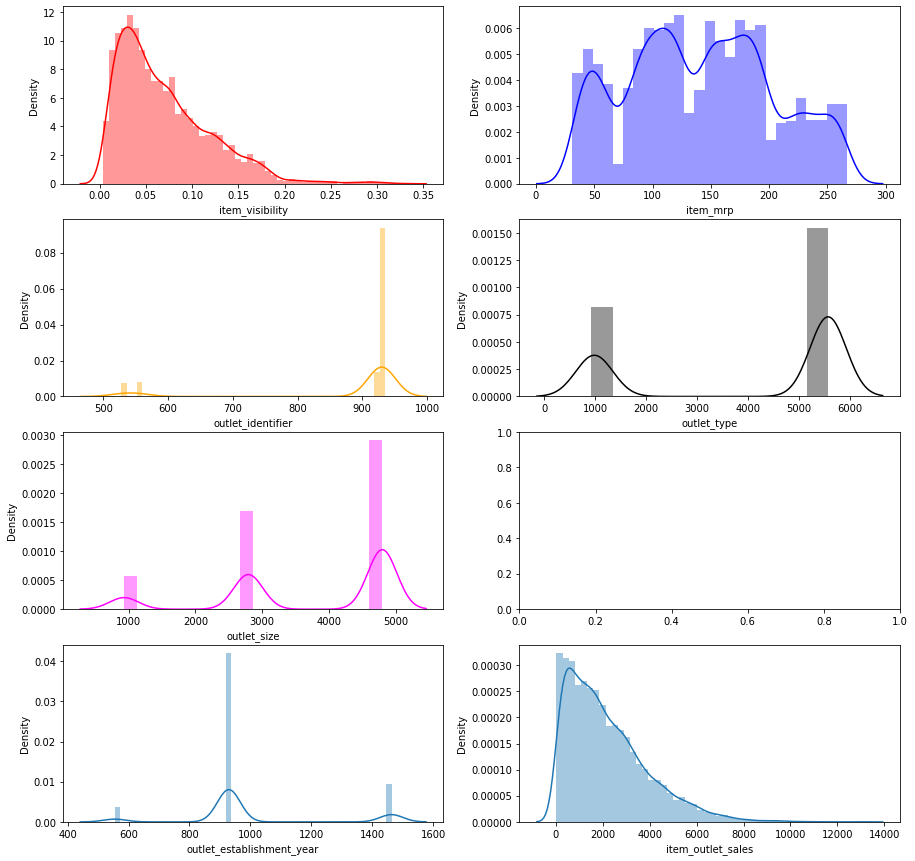

In [53]:
# Before Transformation
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])



In [54]:
new_data.columns

Index(['item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

#### From the above plot it is clear that many columns are not following the normal distribution and not properly scaled. Therefore, we will apply "Logarithmic" Transformation on above dataset to make it scale and reduce the skewness.

In [55]:
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

In [56]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,-4.181625,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

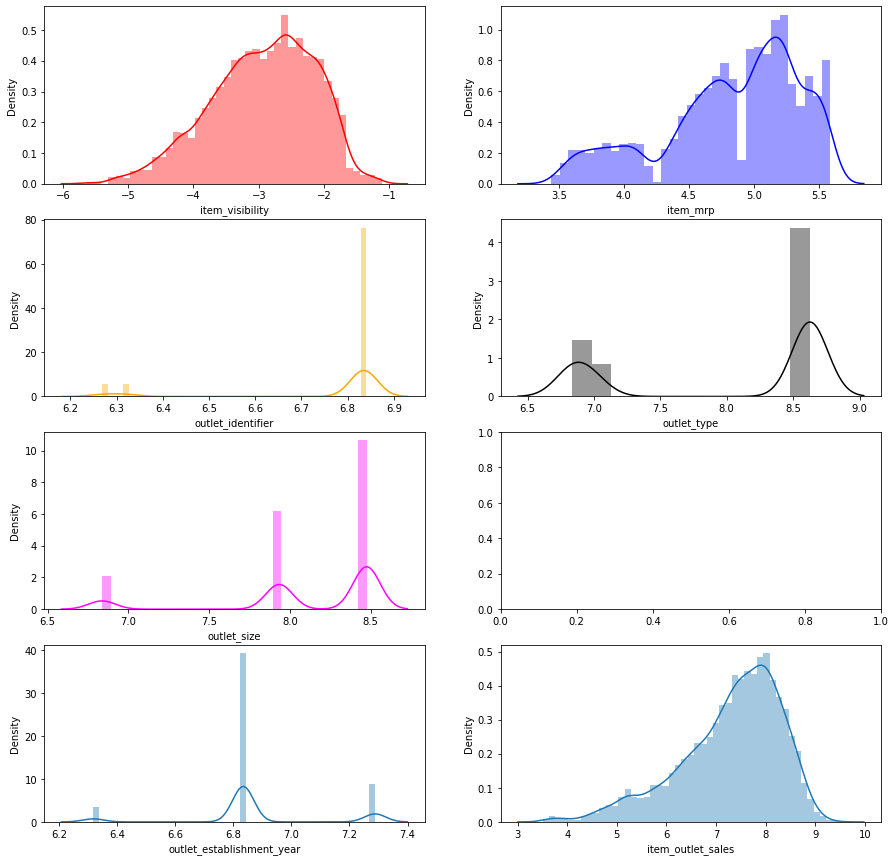

In [57]:
# After Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [58]:
new_data.skew()

item_visibility             -0.429840
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -1.539875
outlet_type                 -0.657515
item_outlet_sales           -0.887753
dtype: float64

# Fitting Linear Regression Model:

In [59]:
#Independent Variables:
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)


In [60]:
x

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406
3,-4.181625,5.204529,6.318968,6.318968,8.475954,6.987490
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406
...,...,...,...,...,...,...
8518,-2.868511,5.368411,6.837333,6.837333,6.837333,8.626406
8519,-3.057982,4.683584,6.834109,6.834109,8.475954,8.626406
8520,-3.347099,4.444090,6.835185,6.835185,8.475954,8.626406
8521,-1.929501,4.636021,6.833032,6.833032,7.934872,6.833032


In [61]:
y

array([[8.22554004],
       [6.09452372],
       [7.64839178],
       ...,
       [7.08432164],
       [7.52055841],
       [6.64075127]])

In [62]:
#Splitting The data  into Train and Test Dataset:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 13)

In [63]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [64]:
#Prediction
y_pred = regressor.predict(x_test)

In [65]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.7079953565588073

In [66]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.5378824974652983

In [67]:
# Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(x,y)

DecisionTreeRegressor()

In [69]:
# Printing Accuracy data
print("Training Accuracy for Decision Tree regressor :", regr.score(x_train, y_train))

Training Accuracy for Decision Tree regressor : 1.0


# Conclusion

### After a whole lot of preprocessiong we were finally able to deveop a dataset which was good enough for our model to run. I didn't explain anything step wise but a lot of it is self explanatory.

## Rest are for formality as we have achieved accuracy of 100 % using decision tree regression

In [87]:
# Other Regression Algorithm

In [88]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()
lr = LinearRegression(normalize=True)
svr = SVR()
#knr = KNeighborsRegressor()
dt = DecisionTreeRegressor(criterion='mse',max_depth=3)
rf = RandomForestRegressor(n_estimators=10,max_depth=5)
gbr = GradientBoostingRegressor()

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn import metrics
def score_reg(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [91]:
lr.fit(x_train,y_train)
score_reg(lr, x_test, y_test)

Mean Absolute Error: 0.418178247561712
Mean Squared Error: 0.2893175810795063
Root Mean Squared Error: 0.5378824974652979
Root Mean Squared Log Error 0.06877739898512474


In [92]:
svr.fit(x_train,y_train)
score_reg(svr, x_test, y_test)

Mean Absolute Error: 0.41437346646624257
Mean Squared Error: 0.2973646795713643
Root Mean Squared Error: 0.545311543588951
Root Mean Squared Log Error 0.07034668102909111


In [93]:
dt.fit(x_train,y_train)
score_reg(dt, x_test, y_test)

Mean Absolute Error: 0.4463496488145625
Mean Squared Error: 0.3299725316482588
Root Mean Squared Error: 0.5744323560248489
Root Mean Squared Log Error 0.07280812543015881


In [94]:
rf.fit(x_train,y_train)
score_reg(rf, x_test, y_test)

Mean Absolute Error: 0.40804162525898385
Mean Squared Error: 0.27993410438518807
Root Mean Squared Error: 0.529087993045758
Root Mean Squared Log Error 0.06750589885959728


In [95]:
gbr.fit(x_train,y_train)
score_reg(gbr,x_test, y_test)

Mean Absolute Error: 0.4055378067932022
Mean Squared Error: 0.27751505150257066
Root Mean Squared Error: 0.5267969737029349
Root Mean Squared Log Error 0.06720080068651171
